In [2]:
import numpy as np
import os
import pandas as pd
from numpy import random as r
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from numpy import random as r

from pylab import *
from IPython.core.pylabtools import figsize

import seaborn as sns
import matplotlib.cm as cm

import sys
# sys.path.insert(0, '../../utils')
# import splicing_utils as spu
# import single_cell_plots as scp
# from single_cell_plots import *

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import comb

mpl.rcParams["mathtext.fontset"] = "stix"

In [3]:
def probability_psi (psi_o, psi, c, r):
    suma = 0
    for m in range(r, np.int(10*r/c)):
        comb_1 = comb(m*psi, r*psi_o)
        comb_2 = comb(m*(1-psi), r*(1-psi_o))
        proba_1 = c**(r+1)
        proba_2 = (1-c)**(m-r)
        
        suma += comb_1*comb_2*proba_1*proba_2
        
    
    return suma

In [4]:
def probability_psi_m_known (psi_o, psi, c, m):
    suma = 0
    #print(psi)
    for r in range(1, m+1):
        #print('hola')
        comb_1 = comb(m*psi, r*psi_o)
        comb_2 = comb(m*(1-psi), r*(1-psi_o))
        proba_1 = c**r
        proba_2 = (1-c)**(m-r)
                
        suma += comb_1*comb_2*proba_1*proba_2/(1-(1-c)**m)
        
    
    return suma

In [5]:
def probability_binary_m_known(m, c, psi):
    return probability_psi_m_known(1, psi, c, m) + probability_psi_m_known(1, psi, c, m)

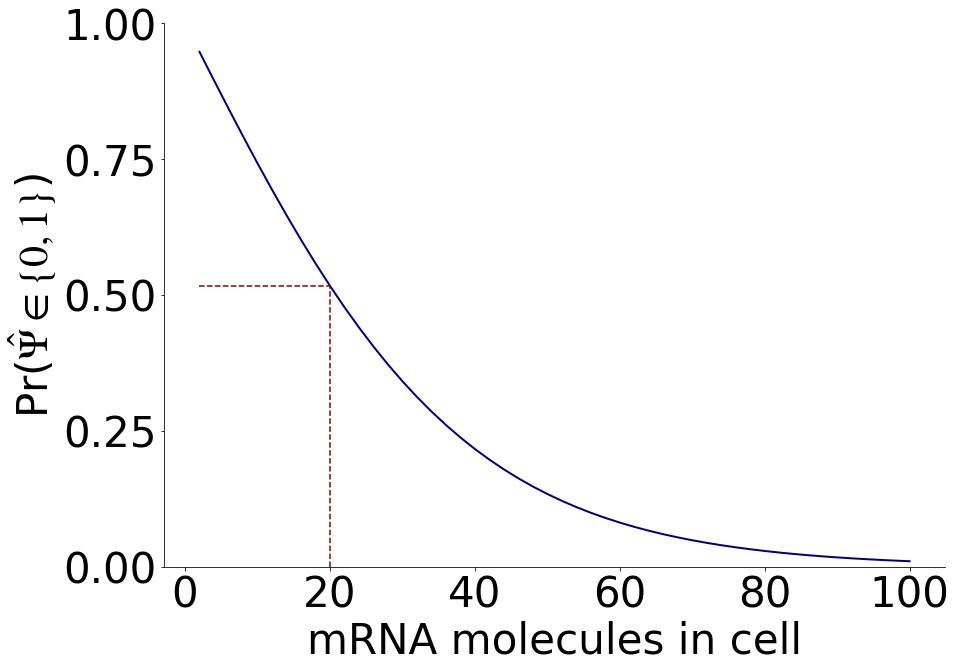

In [7]:
fig = plt.figure(figsize=(14,10))

ax  = plt.subplot(1,1,1)



#plt.legend(frameon=False,  prop={'size': 18})

plt.xlabel('mRNA molecules in cell', fontsize=42)
plt.ylabel('Pr($\hat{\Psi} \in \{0, 1\}$)', fontsize=42)

plt.ylim((0,1))

ylocs = np.array([1, 0.75, 0.5, 0.25, 0])
ynewLabels = np.array(['1.00', '0.75', '0.50', '0.25', '0.00'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.spines['left'].set_linewidth(2)
# ax.spines['bottom'].set_linewidth(2)

# ax.xaxis.set_tick_params(width=2)
# ax.yaxis.set_tick_params(width=2)

ax.plot(range(2,101, 2), [probability_binary_m_known(m, 0.1, 0.5) for m in range(2, 101, 2)], linewidth=2, c='navy')
ax.plot([2, 20], [probability_binary_m_known(20, 0.1, 0.5), probability_binary_m_known(20, 0.1, 0.5)], '--', c='darkred')
ax.plot([20, 20], [0, probability_binary_m_known(20, 0.1, 0.5)], '--', c='darkred')

plt.savefig('plots/supplementary_figure_2c_binary_m_known.pdf', bbox_inches='tight')
plt.savefig('plots/supplementary_figure_2c_binary_m_known.svg', bbox_inches='tight')
plt.savefig('plots/supplementary_figure_2c_binary_m_known.png', bbox_inches='tight')

plt.show()

In [8]:
binary_hm = []
for r in range (2, 26):
    rvec_binary = []
    for psi in np.arange(0.01, 0.51, 0.01):
        proba_binary = probability_psi(1, psi, 0.1, r)
        proba_binary += probability_psi(0, psi, 0.1, r)
        rvec_binary.append(proba_binary)
        
    binary_hm.append(rvec_binary)

In [16]:
binary_hm = np.array(binary_hm)
binary_hm_df = pd.DataFrame(binary_hm, columns=[round(x, 3) for x in np.arange(0.01, 0.51, 0.01)], index=range(2, 26))
#binary_hm_df[binary_hm_df.columns[::-1]]

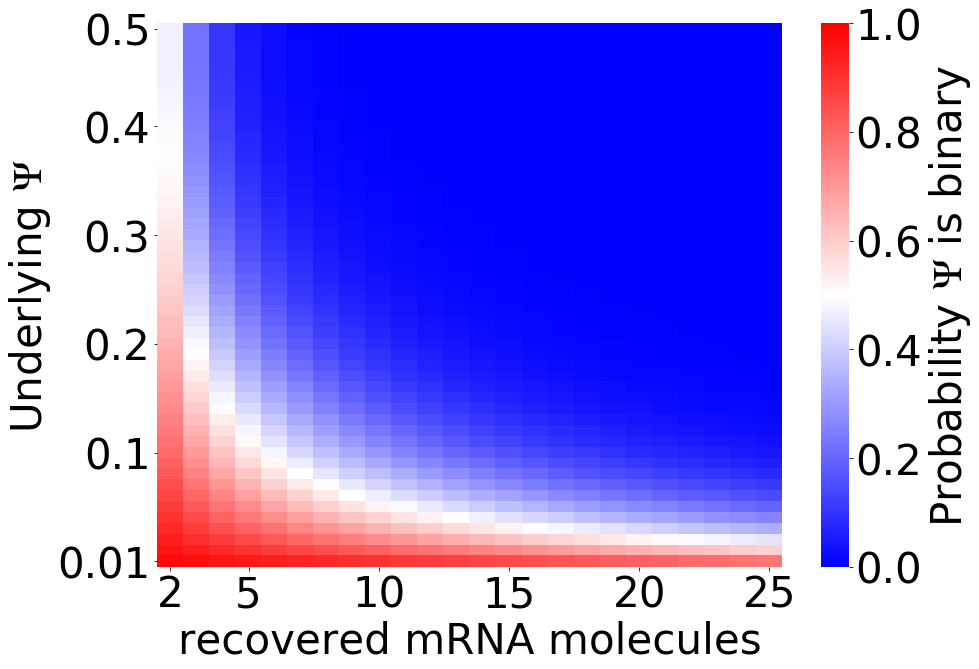

In [10]:
fig = plt.figure(figsize=(14,10))

ax  = plt.subplot(1,1,1)
ax = sns.heatmap(binary_hm_df[binary_hm_df.columns[::-1]].T, cmap='bwr', vmin=0, vmax=1, 
                 cbar_kws={'label': "Probability $\Psi$ is binary",})
ax.figure.axes[-1].yaxis.label.set_size(42)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([49.5, 39.5, 29.5, 19.5, 9.5, 0.5])
ynewLabels = np.array(['0.01', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)

#ax.xaxis.set_tick_params(width=2)
#ax.yaxis.set_tick_params(width=2)


plt.savefig('plots/simulation_0_counts_v_psi.pdf', bbox_inches='tight')
plt.savefig('plots/simulation_0_counts_v_psi.svg', bbox_inches='tight')
plt.savefig('plots/simulation_0_counts_v_psi.png', bbox_inches='tight')
plt.show()

In [ ]:
def auc(psi, min_p, max_p, c, r, res=0.01):
    suma = 0
    for i in np.arange(min_p, max_p+res, res):
        suma += (probability_psi(i, psi, c, r)*res)
        
    return suma


def get_probability(psi, delta, c, r, total_proba=False, res=0.01):
    if not total_proba:
        total_proba = auc(psi, 0, 1, c, r, res)
    proba_delta = auc(psi, psi-delta, psi+delta, c, r, res)
    
    return proba_delta/total_proba

In [11]:
# # hm_1 = []
# # hm_01 = []
# # hm_05 = []
# # hm_25 = []
# hm_5 = []
# hm_9 = []
# #c = 0.1
# for r in range(2, 26):
# #     r_vec_1 = []
# #     r_vec_01 = []
# #     r_vec_05 = []
# #     r_vec_25 = []
#     r_vec_5 = []
#     r_vec_9 = []
#     for psi in np.arange(0.05, 0.55, 0.05):
#         #total_proba = auc(psi, 0, 1, c, r)
# #         proba_1 = get_probability(psi, 0.1, 0.1, r, res=0.02)#, total_proba=total_proba)
# #         proba_01 = get_probability(psi, 0.1, 0.01, r, res=0.02)
# #         proba_05 = get_probability(psi, 0.1, 0.05, r, res=0.02)
# #         proba_25 = get_probability(psi, 0.1, 0.25, r, res=0.02)
#         proba_5 = get_probability(psi, 0.1, 0.5, r)
#         proba_9 = get_probability(psi, 0.1, 0.9, r)
# #         r_vec_1.append(proba_1)
# #         r_vec_01.append(proba_01)
# #         r_vec_05.append(proba_05)
# #         r_vec_25.append(proba_25)
#         r_vec_5.append(proba_5)
#         r_vec_9.append(proba_9)
#         print(psi)
# #     hm_1.append(r_vec_1)
# #     hm_01.append(r_vec_01)
# #     hm_05.append(r_vec_05)
# #     hm_25.append(r_vec_25)
#     hm_5.append(r_vec_5)
#     hm_9.append(r_vec_9)
#     print(r)

# pd.DataFrame(np.array(hm_1)).to_csv('hm_1.tab', sep='\t')
# pd.DataFrame(np.array(hm_01)).to_csv('hm_01.tab', sep='\t')
# pd.DataFrame(np.array(hm_05)).to_csv('hm_05.tab', sep='\t')
# pd.DataFrame(np.array(hm_9)).to_csv('hm_9.tab', sep='\t')
# pd.DataFrame(np.array(hm_25)).to_csv('hm_25.tab', sep='\t')
# pd.DataFrame(np.array(hm_5)).to_csv('hm_5.tab', sep='\t')

In [14]:
hm_01 = np.array(pd.read_csv('hm_01.tab', sep='\t', index_col=0))
hm_05 = np.array(pd.read_csv('hm_05.tab', sep='\t', index_col=0))
hm_1 = np.array(pd.read_csv('hm_1.tab', sep='\t', index_col=0))
hm_25 = np.array(pd.read_csv('hm_25.tab', sep='\t', index_col=0))
hm_5 = np.array(pd.read_csv('hm_5.tab', sep='\t', index_col=0))
hm_9 = np.array(pd.read_csv('hm_9.tab', sep='\t', index_col=0))

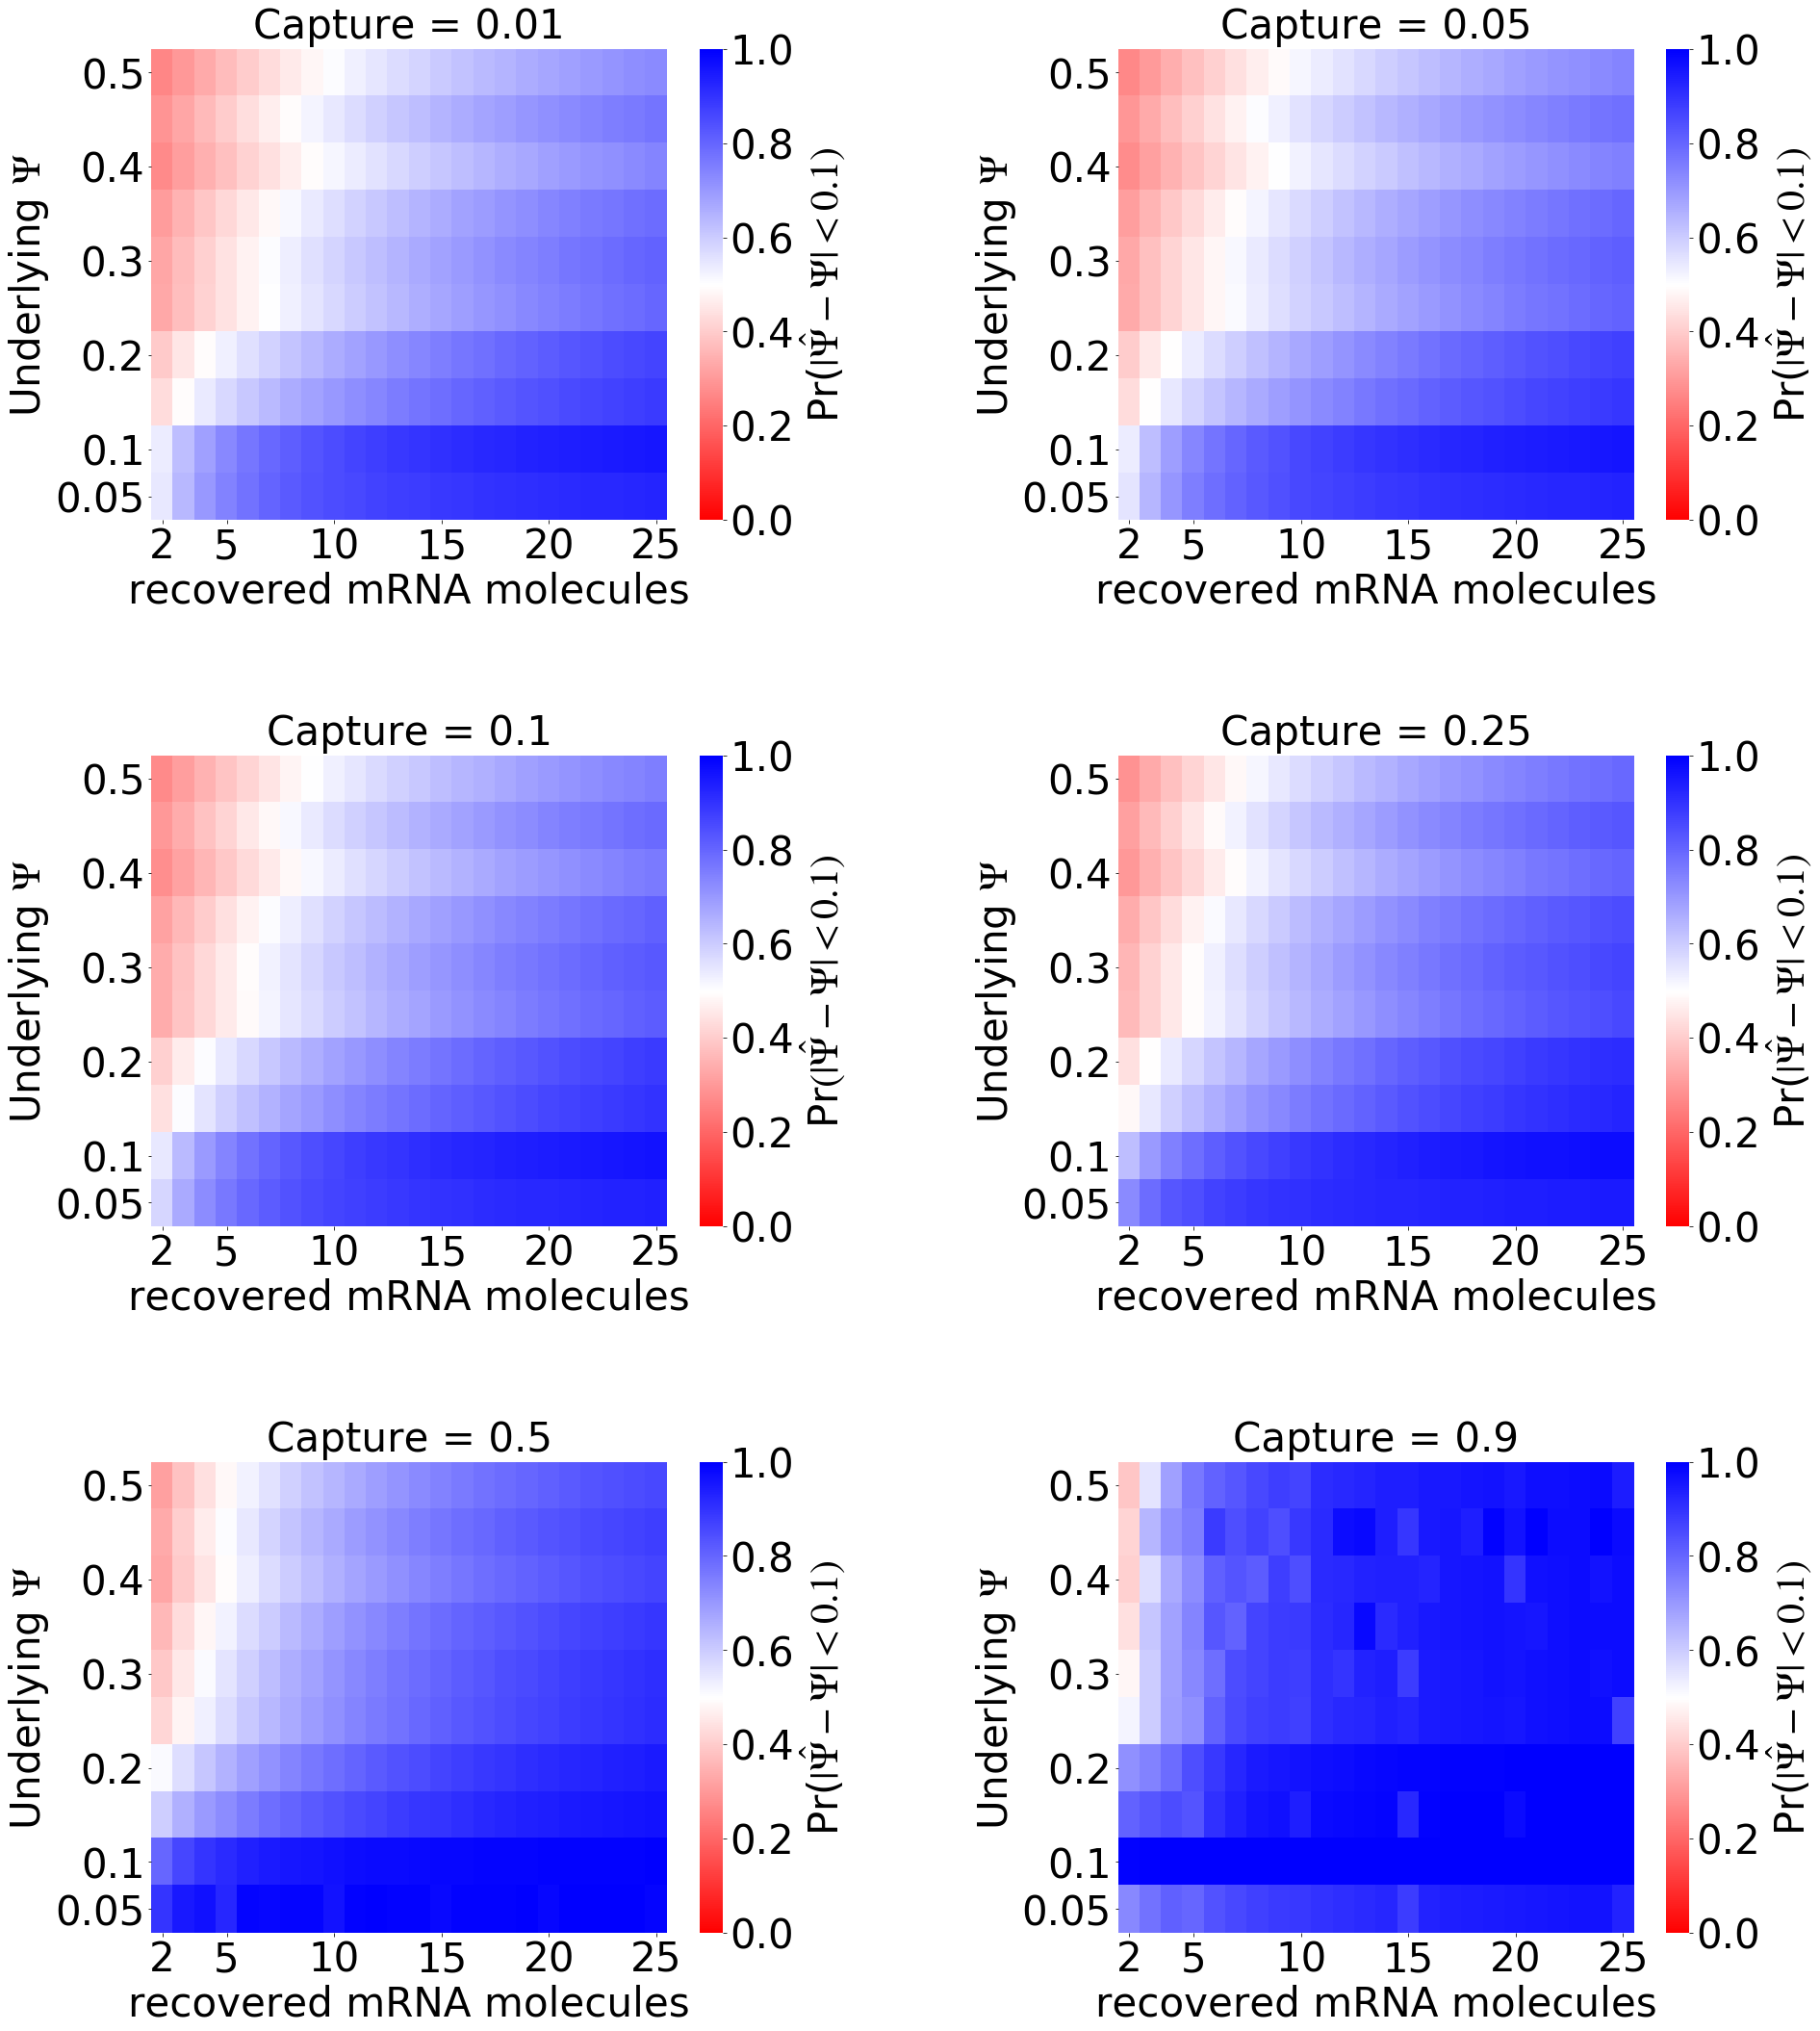

In [15]:
figsize(30,36)
fig = plt.figure()
#fig.tight_layout()
#fig.suptitle(title, fontsize=14)

gs = GridSpec(3,2)
gs.update(wspace=0.5, hspace=0.5)

ax = fig.add_subplot(gs[0,0])
sns.heatmap(hm_01.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.01', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


ax = fig.add_subplot(gs[0,1])
sns.heatmap(hm_05.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.05', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


ax = fig.add_subplot(gs[1,0])
sns.heatmap(hm_1.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr$(|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.1', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


ax = fig.add_subplot(gs[1,1])
sns.heatmap(hm_25.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.25', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


ax = fig.add_subplot(gs[2,0])
sns.heatmap(hm_5.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.5', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


ax = fig.add_subplot(gs[2,1])
sns.heatmap(hm_9.T[::-1], ax=ax, cmap='bwr_r', vmin=0, vmax=1, cbar_kws={'label': "Pr($|\hat{\Psi}-\Psi|<0.1)$",})

ax.figure.axes[-1].yaxis.label.set_size(38)


plt.xlabel('recovered mRNA molecules', fontsize=42)
plt.ylabel('Underlying $\Psi$', fontsize=42)
plt.title('Capture = 0.9', fontsize=42, y=1.01)

#locs, labels = plt.xticks()

xlocs = np.array([0.5, 3.5, 8.5, 13.5, 18.5, 23.5])
xnewLabels = np.array(['2', '5', '10', '15', '20', '25'])
plt.xticks(xlocs, xnewLabels)


ylocs = np.array([9.5, 8.5, 6.5, 4.5,  2.5,  0.5])
ynewLabels = np.array(['0.05', '0.1', '0.2', '0.3', '0.4', '0.5'])
plt.yticks(ylocs, ynewLabels, rotation=0)

ax.tick_params(labelsize=42)
ax.figure.axes[-1].tick_params(labelsize=42)
ax.figure.axes[-1].yaxis.label.set_size(42)


plt.savefig('plots/supplementary_figure_2b_uncertainty.pdf', bbox_inches='tight')
plt.savefig('plots/supplementary_figure_2b_uncertainty.svg', bbox_inches='tight')
plt.savefig('plots/supplementary_figure_2b_uncertainty.png', bbox_inches='tight')


plt.show()